# **Import Library**

In [0]:
import pandas as pd
import numpy as np

# **Import File**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_one = pd.read_csv('/content/drive/My Drive/work/nectec/dataset7.csv',parse_dates=['Date'])
with pd.ExcelFile('/content/drive/My Drive/work/nectec/dataSet4 (2)-newFromITaaS.xlsx') as reader:
  # print(reader.sheet_names)
  df_two = pd.read_excel(reader, sheet_name=reader.sheet_names[1])
df_two

,Item No,Description,Base Unit of Measure,Base Unit of Measure.1,Vendor No,Expiration Period,Item Category Code,Category
0,1111001A,สาลี่ใบเตย,ถุง,ถุง,EKA,6,11.0,EKA-Fresh
1,1111001C,สาลี่ใบเตย-โปร,ถุง,ถุง,EKA,NaN,11.0,EKA-Fresh
2,1111002A,สาลี่นมแมว,ถุง,ถุง,EKA,6,11.0,EKA-Fresh
3,1111002C,สาลี่นมแมว-โปร,ถุง,ถุง,EKA,NaN,11.0,EKA-Fresh
4,1111003A,สาลี่มะลิ,ถุง,ถุง,EKA,6,11.0,EKA-Fresh
...,...,...,...,...,...,...,...,...
9567,952,สิทธิ์แลกซื้อนมเผือกเย็นได้เพียง20.-,แก้ว,แก้ว,EKA,NaN,16.0,EKA-Coffee Shop
9568,98,ซื้อครบ300บ.รับคูปองCOMBO,ชุด,ชุด,EKA,NaN,91.0,EKA-Promotion
9569,99,ส่วนลดซื้อคู่พายมะม่วง+เปี๊ยะนม,ชิ้น,ชิ้น,EKA,NaN,16.0,EKA-Coffee Shop
9570,999,ส่วนลดซื้อคู่สาลี่+ขนมชั้น,ชุด,ชุด,EKA,NaN,93.0,VENDOR-Promotion


# **Clean Data**

In [0]:
df_all_columns = pd.merge(df_one, df_two, on='Item No', how='inner')
df_all_columns['sum_price'] = df_all_columns['Price'] * df_all_columns['Quantity']
df_clean_all = df_all_columns[['Receipt No','Item No','Price','Quantity','Date','Description','sum_price']]
df_clean_all

,Receipt No,Item No,Price,Quantity,Date,Description,sum_price
0,140050000,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0
1,140050221,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0
2,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0
3,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0
4,130031218,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0
...,...,...,...,...,...,...,...
981540,30020755,2751012A,40.0,1.0,2018-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0
981541,40068855,2751012A,40.0,1.0,2018-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0
981542,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0
981543,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0


# **Edit File**

In [0]:
length_all_data = int(len(df_clean_all)/3)
df_clean_all['year'] = 2018
df_clean_all['year'][length_all_data:length_all_data*2] = 2019
df_clean_all['year'][length_all_data*2:length_all_data*3] = 2020
df_clean_all['month'] = df_clean_all['Date'].dt.month
df_clean_all['date'] = df_clean_all['Date'].dt.day

df_clean_all['quarter'] = df_clean_all['Date'].dt.quarter
df_clean_all

# clean_data['Date'] = pd.to_datetime(clean_data['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Receipt No,Item No,Price,Quantity,Date,Description,sum_price,year,month,date,quarter
0,140050000,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
1,140050221,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
2,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
3,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
4,130031218,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
981540,30020755,2751012A,40.0,1.0,2018-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0,2020,9,30,3
981541,40068855,2751012A,40.0,1.0,2018-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0,2020,9,30,3
981542,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0,2020,9,30,3
981543,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0,2018,9,30,3


In [0]:
list_date = []
for i in range(len(df_clean_all)):
  list_date.append(f"{df_clean_all['year'][i]}-{df_clean_all['month'][i]}-{df_clean_all['date'][i]}")
df_clean_all['Date'] = pd.to_datetime(list_date)
df_clean_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Receipt No,Item No,Price,Quantity,Date,Description,sum_price,year,month,date,quarter
0,140050000,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
1,140050221,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
2,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
3,80004023,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
4,130031218,3239082A,35.0,1.0,2018-01-01,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
981540,30020755,2751012A,40.0,1.0,2020-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0,2020,9,30,3
981541,40068855,2751012A,40.0,1.0,2020-09-30,น้ำพริกตาแดงเห็ด3อย่าง(เจ)-แย้มเหน่อ,40.0,2020,9,30,3
981542,40068655,3412173A,1250.0,1.0,2020-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0,2020,9,30,3
981543,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0,2018,9,30,3


# **Between Date**

In [0]:
def between(start_date,end_date):
  df_between_date = df_clean_all[(df_clean_all['Date'] > start_date) & (df_clean_all['Date'] <= end_date)]
  df_between_date['quarter'] = df_between_date['Date'].dt.quarter
  df_between_date
  return df_between_date
df_between_date = between('2018-01-01','2019-12-12')
df_between_date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Receipt No,Item No,Price,Quantity,Date,Description,sum_price,year,month,date,quarter
43,80004220,3239082A,35.0,1.0,2018-01-02,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,2,1
44,80004220,3239082A,35.0,1.0,2018-01-02,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,35.0,2018,1,2,1
45,80004173,3239082A,35.0,3.0,2018-01-02,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,105.0,2018,1,2,1
46,80004173,3239082A,35.0,3.0,2018-01-02,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,105.0,2018,1,2,1
47,80004279,3239082A,35.0,8.0,2018-01-02,ข้าวเม่าทรงเครื่องรสดั้งเดิม-ต้นกล้า,280.0,2018,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
654359,70412151,3211008A,50.0,1.0,2019-05-03,กลีบลำดวน-บ้านต้นกล้า,50.0,2019,5,3,2
654360,90259778,3211008A,50.0,1.0,2019-05-03,กลีบลำดวน-บ้านต้นกล้า,50.0,2019,5,3,2
654361,40054725,3211008A,50.0,1.0,2019-05-03,กลีบลำดวน-บ้านต้นกล้า,50.0,2019,5,3,2
981543,40068655,3412173A,1250.0,1.0,2018-09-30,เสื้อลินินคอปาดผูกโบว์ชาย-ริมนที,1250.0,2018,9,30,3


In [0]:
df_group_receipt = df_between_date.groupby(['Receipt No','year']).count().reset_index()
df_group_receipt = df_group_receipt[['Receipt No','year']]
list_unique_receipt = df_group_receipt['Receipt No'].unique().tolist()
list_unique_receipt
df_receipt_all = df_group_receipt.groupby('Receipt No')
df_receipt_all

In [0]:
df_receipt_all.get_group(80004173)

,Receipt No,year
117430,80004173,2018
117431,80004173,2019


In [0]:
list_all_duplicate = []
list_not_duplicate = []
for i in range(len(list_unique_receipt[:2000])):
  list_year_unique = df_receipt_all.get_group(list_unique_receipt[i])['year'].unique().tolist()
  list_all_duplicate.append(f"{list_year_unique}")

dict_sep_year = dict((i, list_all_duplicate.count(i)) for i in list_all_duplicate)
print(dict_sep_year)



{'[2019]': 971, '[2018, 2019]': 875, '[2018]': 154}


In [0]:
list_unique_year = df_between_date['year'].unique().tolist()
tuple_unique_year = tuple(df_between_date['year'].unique())

list_set_year = []
for i in range(len(list_unique_year)):
  list_set_year.append([list_unique_year[i]])
  for j in range(len(list_unique_year)):
    if i != j and i < j:
      list_set_year.append([list_unique_year[i],list_unique_year[j]])
      for k in range(len(list_unique_year)):
        if i != j and i !=k and j != k and i < k and i < j and j < k:
          list_set_year.append([list_unique_year[i],list_unique_year[j],list_unique_year[k]])
list_set_year.sort(key = lambda x: x[0])
list_set_year = sorted(list_set_year, key=len)
list_set_year



[[2018], [2019], [2018, 2019]]

# **Test**

In [0]:
list_set_year
for i in range(len(list_set_year)):
  try:
    print(dict_sep_year[f"{list_set_year[i]}"])
  except:
    dict_sep_year[f"{list_set_year[i]}"] = 0
dict_sep_year
# dict_sep_year[f"{list_set_year[2]}"]

154
971
875


{'[2018, 2019]': 875, '[2018]': 154, '[2019]': 971}

# **Test**

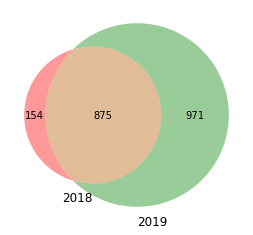

In [0]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import numpy as np


if len(list_unique_year) == 3:
  v=venn3(subsets = (dict_sep_year[f"{list_set_year[0]}"], dict_sep_year[f"{list_set_year[1]}"], dict_sep_year[f"{list_set_year[2]}"], dict_sep_year[f"{list_set_year[3]}"],dict_sep_year[f"{list_set_year[4]}"],dict_sep_year[f"{list_set_year[5]}"],dict_sep_year[f"{list_set_year[6]}"]), set_labels = tuple_unique_year)
  plt.show()
elif len(list_unique_year) == 2:
  venn2(subsets = (dict_sep_year[f"{list_set_year[0]}"], dict_sep_year[f"{list_set_year[1]}"], dict_sep_year[f"{list_set_year[2]}"]), set_labels = tuple_unique_year)
  plt.show()
else:
  fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))
  recipe = list_set_year[0]
  wedges, texts, autotexts = ax.pie(recipe, autopct='{}'.format(dict_sep_year[f"{list_set_year[0]}"]),textprops=dict(color="w"))
  plt.setp(autotexts, size=8, weight="bold")
  ax.set_title("year {}".format(recipe[0]))
  plt.show()



In [0]:
# !pip install plotly==4.2.0
import plotly.graph_objects as go

fig = go.Figure()
# dict_sep_year

def order_qty_keys(qty_dict):
  '''
    return ordered single keys and ordered qty
  '''
  ordered_keys = []
  keys = [eval(x) for x in qty_dict.keys()]
  single = list(filter(lambda x: len(x) == 1, keys))
  single.sort(key = lambda x: x[0])
  multi = list(filter(lambda x: len(x) == 2, keys))
  return (single, [single[0], multi[0], single[1]])


def create_venn_diagram(qty_dict):
  '''
    returns a venn diagram
    qty_dict: (dictionary with maximum three keys)
  '''
  fig = go.Figure()
  if len(qty_dict.keys()) == 3:
    x_coords = [1, 1.75, 2.5]
    y_coords = [1, 1, 1]
    sorted_keys = order_qty_keys(qty_dict)[0]
    sorted_qty = order_qty_keys(qty_dict)[1]
    sorted_qty = ['$'+str(qty_dict[str(key)])+"$" for key in sorted_qty]
    fig.add_trace(go.Scatter(
        x=x_coords,
        y=y_coords,
        text=sorted_qty,
        mode="text",
        textfont=dict(
            color="black",
            size=18,
            family="Arail",
        )
    ))
    fig.add_trace(go.Scatter(
        x=x_coords,
        y=[-0.1, -0.1, -0.1],
        text=["$"+ str(sorted_keys[0][0]) + "$", '$$', "$"+str(sorted_keys[1][0])+"$"],
        mode="text",
        textfont=dict(
            color="black",
            size=18,
            family="Arail",
        )
    ))
    # Update figure dimensions
    fig.update_layout(
        margin=dict(
            l=20,
            r=20,
            b=100
        ),
        height=600,
        width=800,
        plot_bgcolor="white",
        showlegend=False,
    )
    fig.add_shape(
            go.layout.Shape(
                type="circle",
                fillcolor="blue",
                x0=0,
                y0=0,
                x1=2,
                y1=2,
                line_color="blue"
            ))
    fig.add_shape(
            go.layout.Shape(
                type="circle",
                fillcolor="gray",
                x0=1.5,
                y0=0,
                x1=3.5,
                y1=2,
                line_color="gray"
            ))
    fig.update_shapes(dict(
        opacity=0.3,
        xref="x",
        yref="y",
        layer="below"
    ))
    # Update figure dimensions
    fig.update_layout(
        margin=dict(
            l=20,
            r=20,
            b=100
        ),
        height=600,
        width=800,
        plot_bgcolor="white"
    )
  fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False,)
  fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False,)
  return fig

create_venn_diagram(dict_sep_year).show()

In [0]:
# 